# ライブラリ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# 丸めなど

## 切り上げ，切り下げ，四捨五入
mathパッケージにだいたいある．

In [7]:
print('切り上げはmath.ceil(x)を使う.')
print('3.4を切り上げると{}'.format(math.ceil(3.4)))

print('切り下げはmath.floor(x)を使う.')
print('3.4を切り下げると{}'.format(math.floor(3.4)))

print('四捨五入はround(x,n)を使う．小数第n位まで表示する')
print('6.435を四捨五入すると{}'.format(round(6.435,2)))

print('nの位で切り上げなどをしたければ10^nで割ってから10^nをかければいい')
print('324.62を10の位で切り上げるには{}'.format(math.ceil(324.62/10)*10))

切り上げはmath.ceil(x)を使う.
3.4を切り上げると4
切り下げはmath.floor(x)を使う.
3.4を切り下げると3
四捨五入はround(x,n)を使う．小数第n位まで表示する
6.435を四捨五入すると6.43
nの位で切り上げなどをしたければ10^nで割ってから10^nをかければいい
324.62を10の位で切り上げるには330


# 時系列分析

## 自己相関係数
正規分布に従う乱数の自己相関係数を計算すると0近くなる(それはそう)

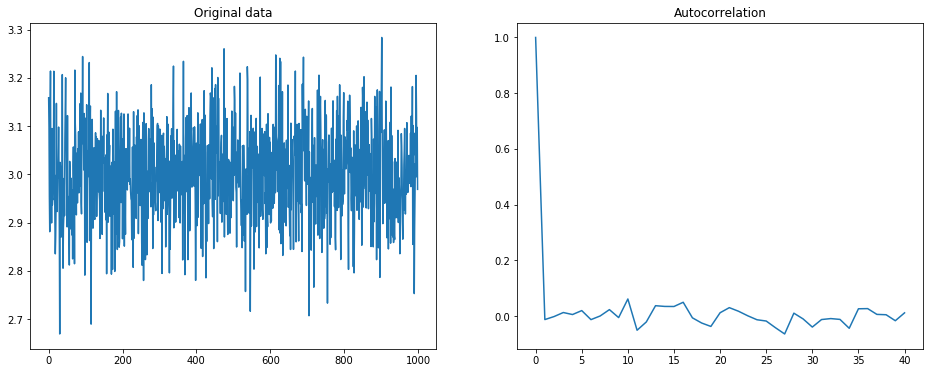

In [245]:
def correlogram(y,mode='none',phi=0.0):
    '''
    これログラムと元の時系列データをプロットする．
    Parameters
    __________
    y:元の時系列データ．
    mode:'ar'の場合は自己回帰モデルを考える．このときは右のこれログラムに1次理想的な自己回帰係数の減衰をプロットする．
    phi:1次の自己回帰モデルのパラメータ
    '''
    # import numpy as np インポート済み
    LAG = 40 # 計算ラグ数
    rk = np.empty(LAG+1) # 自己相関係数の計算結果を保持用
    y_mean = np.mean(y) # 乗客数の平均値

    # ラグ0の自己相関係数：1.0
    rk[0] = np.sum((y - y_mean)**2) / np.sum((y - y_mean)**2) 
    x_axis = np.linspace(0,LAG,LAG+1)

    # ラグ1〜40の自己相関係数：-1.0〜1.0
    for k in np.arange(1, LAG+1): 
        rk[k] = np.sum((y[k:] - y_mean)*(y[:-k] - y_mean)) / np.sum((y - y_mean)**2)

    if mode == 'none':
        plt.figure(figsize=(16,6))
        plt.subplot(1,2,1)
        plt.title('Original data')
        plt.plot(np.linspace(0,len(y)-1,len(y)),y)
        plt.subplot(1,2,2)
        plt.title('Autocorrelation')
        plt.plot(x_axis,rk)
        plt.show()

    if mode == 'ar':
        rho_ideal = [phi**i for i in range(LAG+1)]
        plt.figure(figsize=(16,6))
        plt.subplot(1,2,1)
        plt.title('Original data')
        plt.plot(np.linspace(0,len(y)-1,len(y)),y)
        plt.xlim(10,len(y))
        plt.subplot(1,2,2)
        plt.title('Autocorrelation')
        plt.plot(x_axis,rk,label='raw autocorrelation')
        plt.plot(x_axis,np.abs(rk),label='absolute autocorrelation')
        plt.plot(x_axis,rho_ideal,label='ideal autocorrelation')
        plt.legend(loc='upper right')
        plt.show()
    
x = np.random.normal(3,0.1,1000)
correlogram(x)

## 移動平均(MA)過程
同じコードでも何回か回すと毎回結果が違う(乱数を使っているから当たり前だが)．thetaの下限を0.5にすると割とどれも安定した形になったように思う．q次の自己相関係数は計量時系列分析p.26にある通りだがこれを各変数について最大化するときにthetaが大きいほうがいいということだろうか．thetaがどれも1に近いと自己相関係数は大きくなりがち．

[1.18645594 1.34040517 1.22673023 1.44835476 1.49797856 0.88896864
 0.6254609  0.65462961 1.33142566 1.29592638 0.58452398 1.42013146
 1.26538495 0.50676637 0.54943816 1.24935358 0.64201008 1.46663429
 0.82280607 0.92757809 1.14141614 0.78006048 1.21080109 1.21416605
 0.93673712 0.56062422 0.57919481 1.16902684 0.57690111 0.67025008]


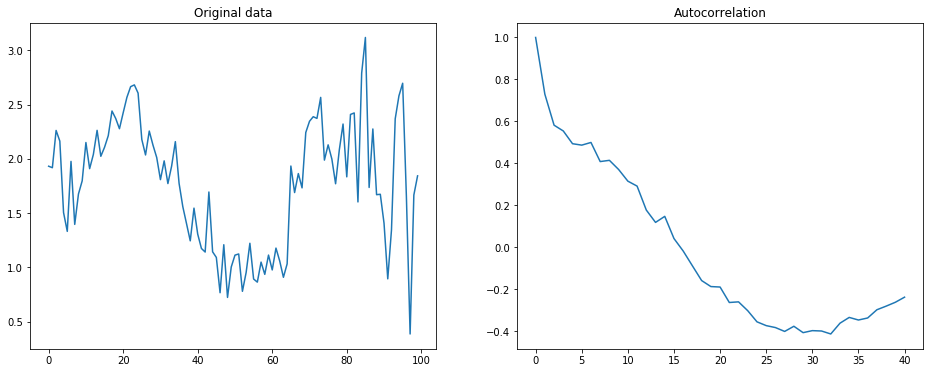

[0.70632906 1.27561231 1.32243325 1.24359008 1.00233008 0.79516593
 0.89186879 0.58949064 1.27224893 1.06966548 1.36751865 1.22019712
 1.37442436 0.56135663 1.27532035 0.86951246 0.90379554 0.97064851
 1.48632973 1.2820454  1.07971675 0.95838287 1.04018344 0.99409793
 0.59471647 1.20615835 1.03629723 1.37657578 1.39559568 1.16594454]


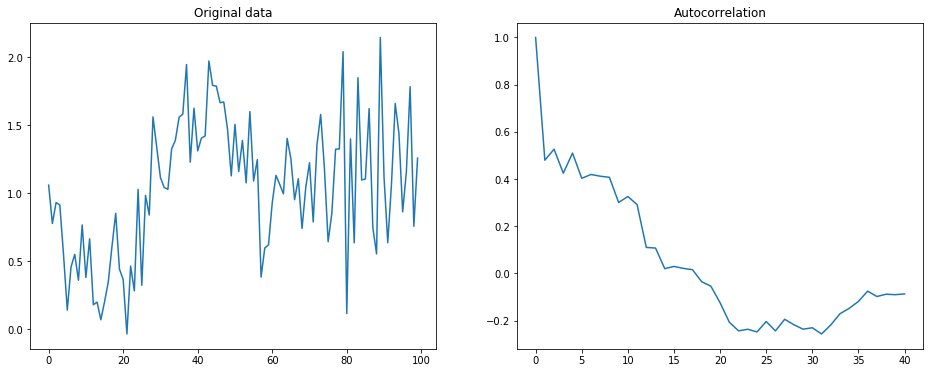

[1.41676551 0.57545048 0.86400008 1.29336646 1.10506028 1.3488931
 0.87697763 1.23897272 1.29588043 1.39168855 1.17814968 0.56901788
 1.3613266  0.57069813 0.52839163 0.79269007 1.08740745 1.43616446
 1.02110083 1.40032433 1.300266   0.97804516 0.75516083 1.02309539
 1.01258271 1.18015207 1.17206722 0.96242092 0.51506106 0.80425016]


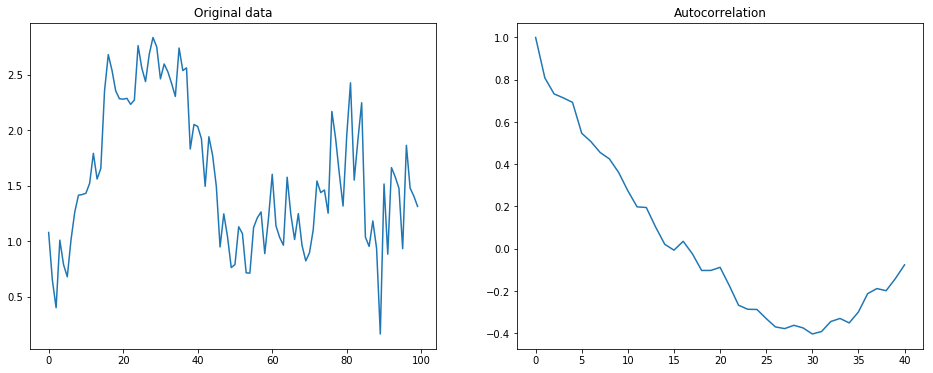

[0.92720143 1.26942913 0.76485607 1.24238392 0.86813474 1.49980159
 0.75262324 0.6068733  0.92243613 1.2201541  1.45556636 1.16704844
 1.04064045 1.26249522 1.10305356 1.18251353 1.05594662 0.77768939
 1.25596081 0.95559439 0.88365173 0.50215095 0.85168222 1.40808916
 0.54773174 0.64092986 1.1914901  1.13736337 1.11505278 1.04802873]


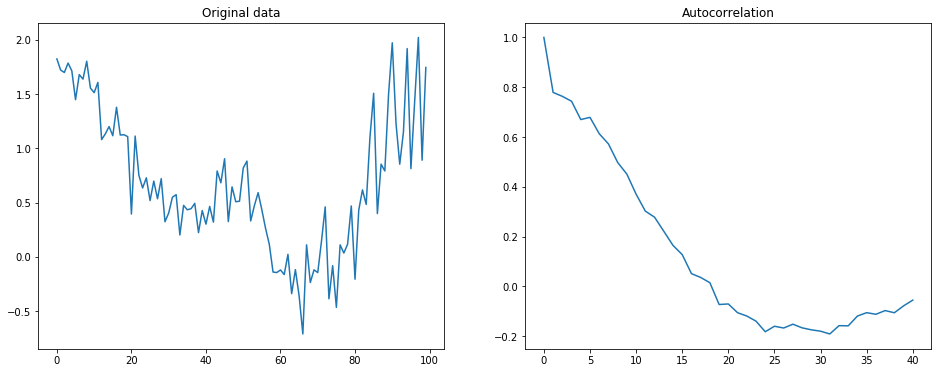

[0.81191289 0.57019601 0.70728381 1.25621087 0.94249775 1.42054602
 0.51174681 1.03115909 1.18755509 1.24378075 0.7425623  0.78812418
 1.26381508 0.95722022 1.44363327 1.47384586 1.05214371 0.57892358
 1.2074051  0.80087524 0.7282453  1.35992097 0.67886581 0.5489663
 1.10464491 0.64385839 0.55762211 0.51113696 0.97832321 0.77454742]


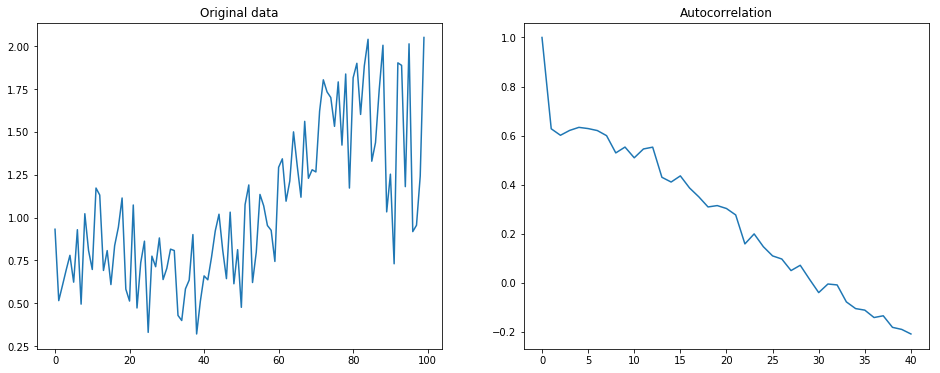

[0.75829788 1.14651371 1.37807398 1.42902712 1.14343986 1.44507795
 1.16155801 0.88475762 0.82889384 0.71591809 0.93407426 1.16321209
 1.38968063 0.75124315 1.05225456 0.59489299 0.59818185 1.22927834
 1.45927685 0.63387415 1.06407735 1.3122821  0.57799094 0.86333833
 1.06301905 0.69381627 0.82910685 1.24722639 0.7434381  0.5409619 ]


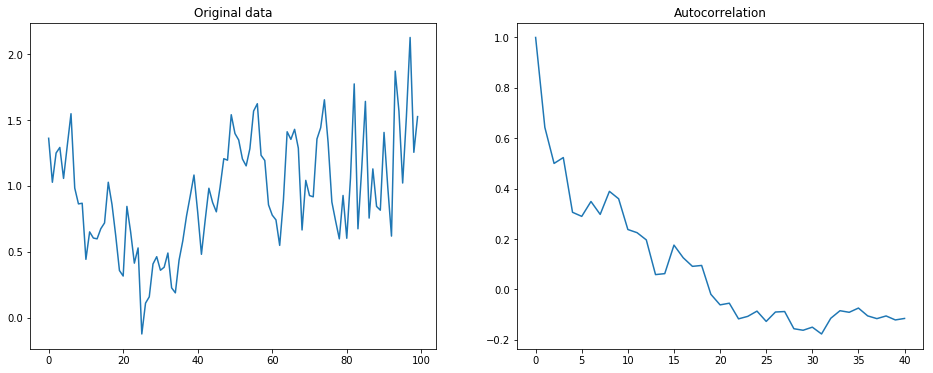

[1.4841465  0.79050269 1.15786409 1.04252978 0.7210782  1.34797602
 0.91918594 0.7473748  0.62587353 1.389944   1.33812678 1.48420722
 0.74593186 1.49646317 1.11545754 1.34501319 1.33707018 1.32159359
 0.69868353 1.14234782 0.74924077 0.5932785  1.44899929 0.81569195
 1.4798347  0.76365781 1.2578565  1.30479207 1.06793265 1.43843399]


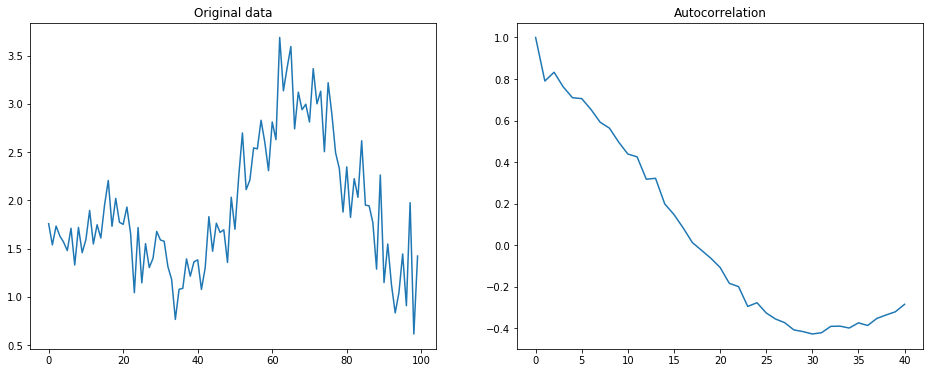

[1.3827913  0.76235998 0.89409041 0.67280813 1.29662955 1.12111751
 0.50391825 0.94887951 1.47699692 1.41813031 1.45844318 1.42897596
 1.12792283 0.82810998 1.28087493 0.50423733 0.95571552 1.39285165
 0.7696475  0.5757085  0.60365102 0.92505379 1.26269917 0.98757048
 1.00061482 1.06261929 0.86707506 0.81860036 0.60819826 1.17417629]


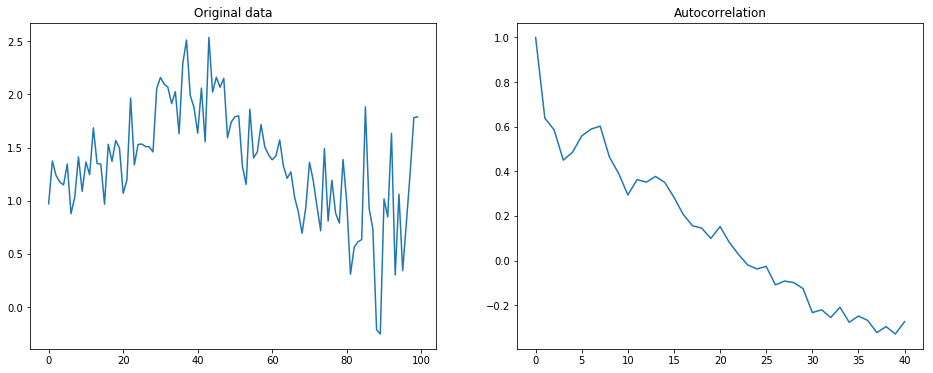

[0.79078005 1.05689938 1.45582065 1.39653837 0.91045192 0.84858023
 0.96766435 0.55070582 0.89050618 1.17701984 0.8672623  1.36917693
 0.56015157 1.16534148 0.87049611 1.30712569 0.65930958 0.61504826
 1.31574926 0.76656339 0.82437224 1.31999199 1.38739712 0.76569602
 0.83453834 0.57664663 0.81661441 0.77151083 0.64711187 0.89311297]


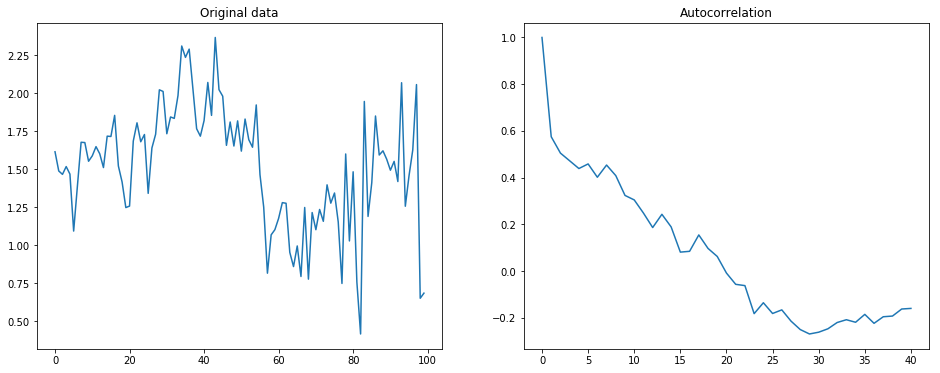

[1.3414112  0.60342294 0.98421999 1.42101687 0.73681147 0.53336439
 1.12123965 0.58207764 0.50319061 1.17946827 0.57673432 1.14309607
 1.19608038 0.97337837 0.97721465 0.96442669 0.53516873 1.17079131
 0.56136905 1.00875989 0.93389873 0.72068837 1.21352971 1.09357881
 0.62766519 0.60559395 1.3564842  1.44247541 1.16428831 0.71536309]


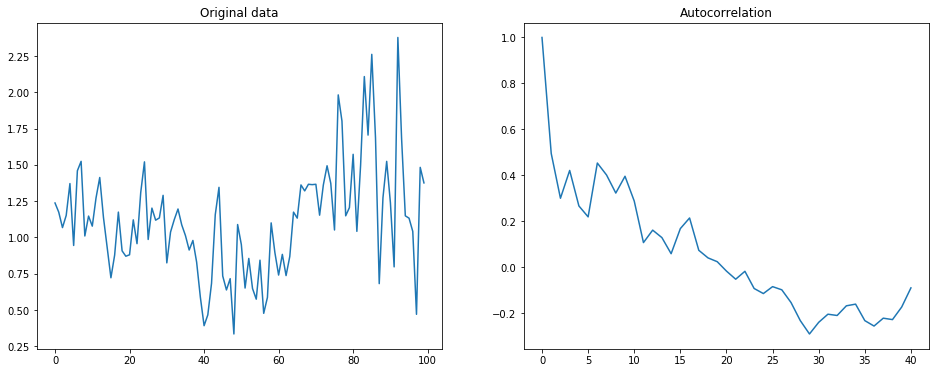

In [42]:
for iternum in range(10):
    x = np.random.normal(0,0.1,100)#epsilon_tのもとになるやつ．これをスライドさせてepsilon_t-1とかをつくる
    theta = np.random.uniform(0.5,1.5,30)#MAモデルのパラメータtheta
    mu = 1.3
    y = mu+epsilon_t
    for i in range(len(theta)):
        y += theta[i]*np.hstack((x[i+1:],np.random.normal(0,0.1,i+1)))


    #y = 1.3+epsilon_t+0.7*epsilon_t_1
    print(theta)
    correlogram(y)

## 自己回帰(AR)過程
### AR(1)過程

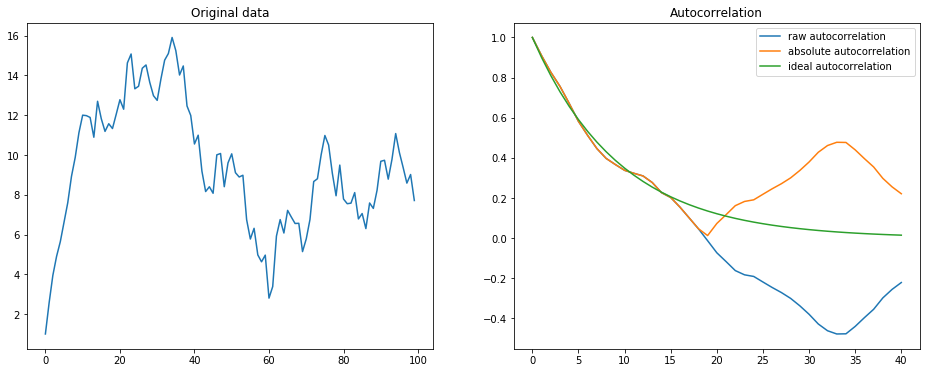

In [63]:
c = 1.0
phi = 0.9
data_num = 100
noise = np.random.normal(0,1.0,data_num)
y = [c]
for i in range(1,data_num):
    y_t = c+phi*y[i-1]+noise[i]
    y.append(y_t)
correlogram(y,mode='ar',phi=phi)

### AR(p)過程
$p$次のAR過程の式は$y_t =c+\phi_1 y_{t-1}+\phi_2 y_{t-2}+\cdots\phi_p y_{t-p}+\epsilon_t$であり，AR過程の特性方程式は$1-\phi_1 z -\phi_2 z^2 -\cdots-\phi_p z^p =0$.AR特性方程式の解の絶対値がすべて1**より大きければ**定常.次数が大きいほど定常なパラメータの組み合わせを見つけにくくなる．乱数で生成しているから当然と言えば当然か．ただ次数が高い場合の定常条件を解析的に求めるのは難しそう．

AR過程では定常になる条件があるらしい．https://qiita.com/caprest/items/a3c19135465f0c15c4a6　によるとAR特性方程式の解は行列の固有値計算に帰着できるらしい．

特性方程式$s^n +a_{n-1}s^{n-1}+\cdots +a_1 s+a_0 =0$の解は以下の行列の固有値に等しい．

$A=\begin{pmatrix}
0&1&0&\cdots&0\\
0&0&1&\cdots&0\\
&&&\ddots&\\
0&\cdots&\cdots&&1\\
-a_0&-a_1&\cdots&-a_{n-2}&-a_{n-1}
\end{pmatrix}$

[0.5 0.3]
1.1735990964653829


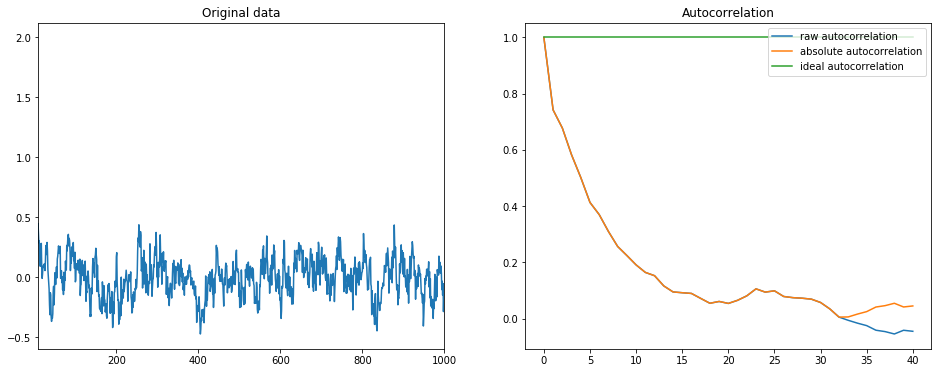

In [251]:
def solve(vec,is_complex=False):
    dim =len(vec)
    if is_complex:
        A = np.zeros((dim,dim),dtype=complex)
    else:
        A = np.zeros((dim,dim))
    A[np.arange(dim-1),1+np.arange(dim-1)] =1
    A[-1,:] = -vec
    ans,vec = np.linalg.eig(A)
    return ans

def solve_for_ar(phis):
    '''
    AR特性方程式を解いて解を返す．上にあるように普通の特性方程式とAR過程のパラメータを並べたものは違うことに注意
    Parameters
    __________
    phis:[phi1,phi2,...]phiが収められた配列
    '''
    dim = len(phis)
    A = np.zeros((dim,dim))#AR特性方程式の解はこの行列Aの固有値に帰着する
    A[np.arange(dim-1),1+np.arange(dim-1)] = 1
    vec = np.hstack(([1.0],-phis))/-phis[-1]
    return solve(vec[:-1])
    
p = 2#AR(10)次過程を考える
#phi = np.random.uniform(-0.3,2.0,p)
phi = np.array([0.5,0.3])
c = 0.0
data_num = 1000
y = np.zeros(data_num)
#y_initial = np.random.normal(0,2,p-1)
y_initial = [p-i for i in range(p-1)]
y[:p-1] = y_initial


print(phi)
print(np.abs(solve_for_ar(phi)).min())
for i in range(p-1,data_num):
    y_t = c + np.random.normal(0,0.1)
    for j in range(p):
        y_t += phi[j]*y[i-(j+1)]
    y[i] = y_t
correlogram(y,mode='ar',phi=1)


# ライブラリの使い方

## matplotlib

<IPython.core.display.Javascript object>


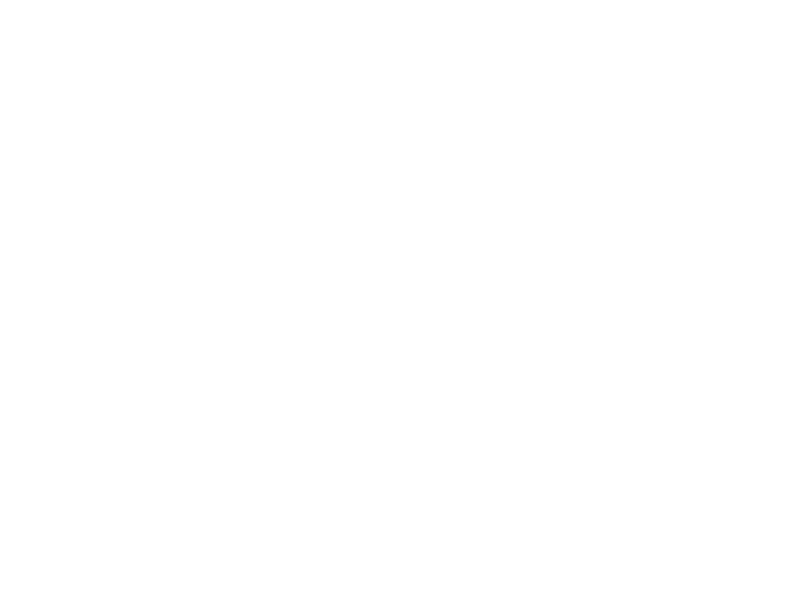

In [9]:
#%matplotlib notebook
fig = plt.figure()
#ax = fig.add_subplot(111)
#ax.plot(np.random.rand(10))
def onclick(event):
    print('event.button=%d,  event.x=%d, event.y=%d, event.xdata=%f, \
    event.ydata=%f'%(event.button, event.x, event.y, event.xdata, event.ydata))
def oncpaint(event):
    ind=np.searchsorted(x,event.xdata)
    plt.title("You clicked index="+str(ind))
    #ax.plot([x[ind]],[y[ind]],".",color="red")
    fig.canvas.draw()

cid = fig.canvas.mpl_connect('button_press_event', oncpaint)
plt.show()


## graphviz

In [7]:
from graphviz import Digraph
# 論文時短検討において分野相関図を作るテスト．
# 論文のデータはpandasのDataFrame形式とする．
def create_paper_df(info):
    '''
    論文情報が格納されたdataframeを返す．
    
    Parameters
    __________
    info:list.[title,author,year]情報追加可能
    
    Returns
    _______
    df:DataFrame
    '''
    title  = info[0]
    author = info[1]
    year   = info[2]
    return pd.DataFrame({
    'title' :[title],
    'author':[author],
    'year'  :[year] })

yamada_2003 = {'title':'Transition-Based','author':'Yamada','year':'2003'}
niver_2007 = {'title':'','author':'Niver','year':'2007'}
zhang_2011 = {'title':'','author':'Zhang','year':'2011'}
chen_2014  = {'title':'','author':'Chen','year':'2014'}
hochreiter_1997 = {'title':'LSTM','author':'Hochreiter','year':'1997'}
das_1992 = {'title':'NNPDA','author':'Das et al','year':'1992'}


paper_info = create_paper_df(['stack LSTM', 'C Dyer', '2015'])
paper_info = paper_info.append(create_paper_df(['Transition-Based','Yamada','2003']),ignore_index=True)
paper_info = paper_info.append(create_paper_df(['','Nivre','2007']),ignore_index = True)
paper_info = paper_info.append(create_paper_df(['','Zhang','2011']),ignore_index = True)
paper_info = paper_info.append(create_paper_df(['','Chen' ,'2014']),ignore_index = True)
paper_info = paper_info.append(create_paper_df(['LSTM','Hochreiter','1997']),ignore_index = True)
paper_info = paper_info.append(create_paper_df(['NNPDA','Das et al','1992']),ignore_index = True)
print(paper_info)

              title      author  year
0        stack LSTM      C Dyer  2015
1  Transition-Based      Yamada  2003
2                         Nivre  2007
3                         Zhang  2011
4                          Chen  2014
5              LSTM  Hochreiter  1997
6             NNPDA   Das et al  1992


### subgraph
クラスターごとに色分けができる．このときsubgraphの名前をcluster(すべて小文字)から始めないと描画したときに色付きでクラスターが囲われない．
またjupyter lab上で描画するにはDigraph()のインスタンスを呼ぶだけでいい(この場合gだけで描画される)

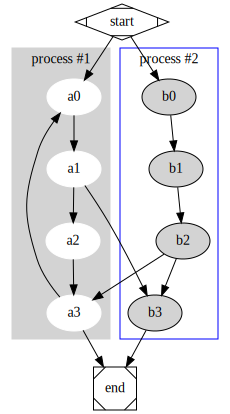

In [3]:
g = Digraph('G', filename='cluster.gv')

# NOTE: the subgraph name needs to begin with 'cluster' (all lowercase)
#       so that Graphviz recognizes it as a special cluster subgraph

#NOTEにあるようにsubgraphの名前をclusterから始めないと囲ってくれない

with g.subgraph(name='cluster_0') as c:
    c.attr(style='filled')
    c.attr(color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    c.edges([('a0', 'a1'), ('a1', 'a2'), ('a2', 'a3')])
    c.attr(label='process #1')

with g.subgraph(name='cluster_1') as c:
    c.node_attr.update(style='filled')
    c.edges([('b0', 'b1'), ('b1', 'b2'), ('b2', 'b3')])
    c.attr(label='process #2')
    c.attr(color='blue')

g.edge('start', 'a0')
g.edge('start', 'b0')
g.edge('a1', 'b3')
g.edge('b2', 'a3')
g.edge('a3', 'a0')
g.edge('a3', 'end')
g.edge('b3', 'end')

g.node('start', shape='Mdiamond')
g.node('end', shape='Msquare')

g#.viewつけると画面に描画されない

In [27]:
p = Digraph(name='parent', filename='paper')

with p.subgraph(name='cluster_nn') as c:
    c.attr(style='filled')
    c.attr(color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    c.edge(paper_info.loc[1,'title'],paper_info.loc[4,'title'],label='NN')
    c.edge(paper_info.loc[4,'title'],paper_info.loc[0,'title'],label='stack')
    c.attr(label='Neural Networks')

with p.subgraph(name='cluster_stack') as c:
    c.attr(style='filled')
    c.attr(color='lightblue')
    c.node_attr.update(style='filled', color='white')
    c.edge(paper_info.loc[5,'title'],paper_info.loc[6,'title'],label='stack implemented')
    c.edge(paper_info.loc[6,'title'],paper_info.loc[0,'title'],label='embedding')
    c.attr(label='stack implementation')

p.view()

'paper.pdf'

## scikit-learnのGaussian Process

In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import numpy as np
import matplotlib.pyplot as plt

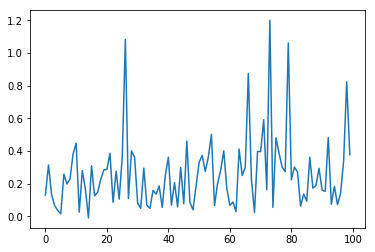

In [3]:
np.random.seed(0)
data_num = 100
variance_y = 0.03
x1 = np.random.uniform(low=0.0,high=4.0*np.pi,size=data_num)
x2 = np.random.uniform(low=0.0,high=10,size=data_num)
x3 = np.random.uniform(low=0.0,high=0.4,size=data_num)
noise_y = np.random.normal(loc=0.0,scale=variance_y,size=data_num)
y = np.exp(-x2)*np.abs(np.sin(x1))+x3+noise_y
xaxis = np.arange(0.0,data_num,1)
plt.plot(xaxis,y)
plt.show()
X_train = np.array([x1,x2,x3]).T
Y_train = y


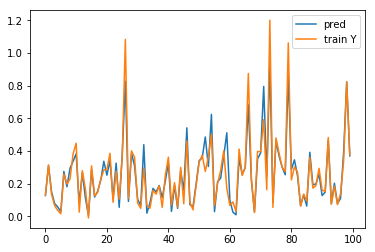

<bound method BaseEstimator.get_params of GaussianProcessRegressor(alpha=0.03, copy_X_train=True,
             kernel=RBF(length_scale=[0.1, 0.6, 1]),
             n_restarts_optimizer=0, normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=None)>
[0.12633176 0.30946129 0.14865268 0.07714926 0.05676517 0.02785263
 0.27416561 0.18028407 0.29299052 0.33641547 0.38226557 0.07788441
 0.26721755 0.11201179 0.0047895  0.28543228 0.1173675  0.1528126
 0.22012828 0.33619416 0.25102594 0.34159574 0.10906835 0.3247123
 0.05425501 0.38673133 0.82570095 0.09053803 0.3851676  0.30843023
 0.10349499 0.06540356 0.43766966 0.0183948  0.08163697 0.17027113
 0.14839721 0.18811811 0.11339684 0.21573105 0.32539211 0.02967679
 0.1877608  0.04800083 0.27681495 0.15858948 0.54105049 0.06995615
 0.05847115 0.19519004 0.34029591 0.35723592 0.48524747 0.30396018
 0.62382119 0.02778732 0.21101319 0.23316594 0.36866946 0.51066271
 0.09714398 0.02397345 0.00874536 0.35323197 0.25566616 0.29825156

In [8]:
weights = np.array([0.1,0.6,1.0],dtype=float)
gp = GaussianProcessRegressor(kernel=RBF(length_scale=weights),alpha=variance_y,optimizer='fmin_l_bfgs_b',normalize_y=True)

gp.fit(X_train, Y_train)

y_pred = gp.predict(X_train,return_std=True)#array([mu,std])

plt.plot(xaxis,y_pred[0],label='pred')
plt.plot(xaxis,Y_train,label='train Y')
plt.legend()
plt.show()
print(gp.get_params)
print(y_pred[0])

## GPy

In [1]:
import GPy
import numpy as np
import matplotlib.pyplot as plt


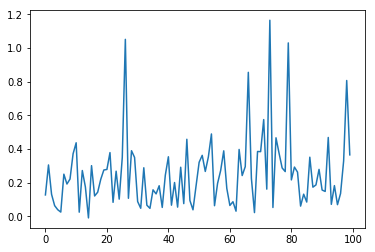


Name : GP regression
Objective : 93.3205400902229
Number of Parameters : 5
Number of Optimization Parameters : 5
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |   (3,)  |      +ve      |        
  Gaussian_noise.variance  |   0.03  |      +ve      |        
  index  |  GP_regression.rbf.lengthscale  |  constraints  |  priors
  [0]    |                     0.10000000  |      +ve      |        
  [1]    |                     0.60000000  |      +ve      |        
  [2]    |                     1.00000000  |      +ve      |        
[[ 0.12665879  0.30485745  0.13025013  0.06294777  0.03888949  0.02456846
   0.24997469  0.19144198  0.22104364  0.37144202  0.43666377  0.0241064
   0.27170028  0.17405936 -0.01003838  0.3006798   0.12044458  0.14276266
   0.219525    0.27489134  0.27804297  0.3782909   0.08262718  0.26783548
   0.10166284  0.34977345  1.0515615

In [7]:
weights = np.array([0.1,0.6,1.0],dtype=float)
kernel = GPy.kern.RBF(input_dim = 3,variance = 1.0,lengthscale = weights,ARD=True)#varianceはカーネルの先頭の係数
model = GPy.models.GPRegression(X_train, Y_train[:,None], kernel,noise_var = variance_y)#noise varは誤差がのっている正規分布の分散
pred_gpy_wop = model.predict_quantiles(X_train, quantiles=(16, 50, 84))#quantilesは四分点．帰ってくるのはこの%信頼区間.正規分布の1σ区間は全体のおよそ68%収まるので
#pred_gpy_wopのサイズは(3,data_num,data_num)だと思われる．
plt.plot(xaxis,pred_gpy_wop[1])
plt.show()
print(model)
print(model['rbf.lengthscale'])
print(pred_gpy_wop[1].T)